<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##*Lab 4*: CART

###**Tenggat Waktu: 14 Oktober 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab4_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **14 Oktober 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pertanyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Riris Melissa Winona Togatorop"
KELAS = "E"
NPM = "1906398906"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680", "https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/"]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Riris Melissa Winona Togatorop dari kelas E dengan NPM 1906398906, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Riris Melissa Winona Togatorop)


# Dataset

Tugas ini menggunakan <b>Dataset Flight Price Prediction</b> <br>
(Sumber: https://www.kaggle.com/datasets/vinaypratap/flight-price-prediction-1 dengan perubahan.)  
Dataset terdiri dari:
 - 6 atribut 
    * Airline – Nama perusahaan penerbangan
    * Source – Kota asal keberangkatan
    * Destination – Kota tujuan
    * Total_Stops - Berapa banyak pesawatnya berhenti 
    * Additional_Info - Tambahan info terkait perjalanan tersebut
    * Duration_Hours - Berapa jam lama perjalanan 
 - 1 target
    * Price - Harga tiket perjalanan 
 - 10681 baris data

# Read Dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

# Import data
df = pd.read_csv('Flight Price Prediction.csv')
df.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Duration_Hours,Price
0,IndiGo,Banglore,New Delhi,0,No info,2.833333,3897
1,Air India,Kolkata,Banglore,2,No info,7.416667,7662
2,Jet Airways,Delhi,Cochin,2,No info,19.000000,13882
3,IndiGo,Kolkata,Banglore,1,No info,5.416667,6218
4,IndiGo,Banglore,New Delhi,1,No info,4.750000,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10681 non-null  object 
 1   Source           10681 non-null  object 
 2   Destination      10681 non-null  object 
 3   Total_Stops      10681 non-null  int64  
 4   Additional_Info  10681 non-null  object 
 5   Duration_Hours   10681 non-null  float64
 6   Price            10681 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 584.2+ KB


# Data-Preprocessing

In [5]:
# One-hot encoding pada data nominal
df = pd.get_dummies(df, drop_first=True)

In [38]:
df

,Total_Stops,Duration_Hours,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,2.833333,3897,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,2,7.416667,7662,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,19.000000,13882,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,5.416667,6218,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,4.750000,13302,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,0,2.500000,4107,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10677,0,2.583333,4145,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10678,0,3.000000,7229,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10679,0,2.666667,12648,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


# Data-Processing

In [6]:
# Memisahkan features and label
X = df.drop('Price', axis=1)
y = df['Price']

In [7]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi training set dan test set
# dengan jumlah test set adalah sebanyak 25% dari data keseluruhan 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## CART (Classification and Regression Tree)

### Decision Tree

Decision Tree adalah sebuah model yang menggunakan struktur berupa Binary  Tree (Setiap node memiliki maksimal 2 children). Decision Tree digunakan pada data science yang bersifat Supervised Learning (Model akan dibangun menggunakan data training, lalu selanjutnya akan digunakan untuk memprediksi output dari data yang diberikan). Data training yang dilakukan untuk melatih model akan diubah menjadi serangkaian aturan yang berbentuk Binary Tree. Aturan yang didapat tersebut  digunakan untuk proses prediksi pada data yang lainnya.

#### Training

In [8]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def metrics(prediction):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
# Melakukan training pada model decision tree
dt_md2 = DecisionTreeRegressor(max_depth=2, random_state=42)
dt_md2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

#### Evaluasi

In [11]:
# Memprediksi data testing
prediction = dt_md2.predict(X_test)

# Call the metrics function
metrics(prediction)

MAE: 2400.183519409751
MSE: 11062616.181279806
RMSE: 3326.05113930616
R_squared: 0.46436131655623414


#### *Hyperparameter*

*Hyperparameter* merupakan parameter yang bisa kita ubah/atur nilainya sebelum kita membangun model yang akan digunakan. Tujuan dari perubahan parameter tersebut adalah untuk menghasilkan model yang harapannya bisa bekerja dengan lebih baik.  

>Terdapat beberapa hyperparameter pada berbagai algoritma *machine learning*, salah satunya adalah pada algoritma Decision Tree. Beberapa *hyperparameter* yang terdapat pada algoritma  Decision Tree di modul `sklearn.tree` adalah: 
- `criterion`: Kriteria untuk menilai seberapa bagus pemecahan node, di antaranya:
    - quared_error: variance reduction as feature selection criterion and minimizes the L2 loss using the mean of each terminal node
    - friedman_mse: mean squared error with [Friedman’s improvement score](https://datascience.stackexchange.com/questions/66062/what-is-the-difference-between-freidman-mse-and-mse) for potential splits `(tenang gaakan muncul di ujian)`
    - absolute_error: minimizes the L1 loss using the median of each terminal node
    - poisson: uses reduction in [Poisson deviance](https://data.princeton.edu/wws509/notes/a2s5) to find splits
- `max_depth`: Kedalaman maksimal dari Tree
- `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node

Informasi lebih lanjut dapat dilihat pada dokumentasi berikut:
[sklearn decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

In [12]:
# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=3
dt_md6 = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_md6.fit(X_train, y_train)

# Memprediksi data testing
predicted6 = dt_md6.predict(X_test)

# Menampilkan metrics evaluasi 
metrics(predicted6)

MAE: 1686.2331042308267
MSE: 6273360.8419512585
RMSE: 2504.6678106989075
R_squared: 0.6962513489497466


Perubahan *hyperparameter* dapat mempengaruhi performa dari model. Pada awalnya tanpa max_depth model menghasilkan *MAE* 2400 dan *RMSE* 3326. Setelah dilakukan perubahan *hyperparameter* dengan `max_depth = 6`, kita dapat melihat bahwa ada peningkatan pada performa model dengan *MAE* 1686 dan *RMSE* 2504

Bagaimana jika hyperparameter lain diubah? Silakan eksplorasi perubahan hyperparameter lain secara mandiri ya!😃

### Visualisasi Decision Tree yang Dihasilkan

Kita bisa melakukan visualisasi terhadap serangkaian aturan yang membentuk Decision Tree yang telah dibangun. Salah satu caranya adalah dengan menggunakan modul `sklearn.tree.plot_tree` dengan bantuan `matplotlib`.

Berikut adalah contoh visualisasi decision tree pada dataset travel insurance tanpa max depth:

In [13]:
from sklearn import tree

In [14]:
# Membangun model tree
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(tree_model, feature_names=pd.Series(X.columns).array))

|--- Duration_Hours <= 5.46
|   |--- Airline_Jet Airways Business <= 0.50
|   |   |--- Duration_Hours <= 2.88
|   |   |   |--- Destination_New Delhi <= 0.50
|   |   |   |   |--- Airline_SpiceJet <= 0.50
|   |   |   |   |   |--- Airline_IndiGo <= 0.50
|   |   |   |   |   |   |--- Duration_Hours <= 1.38
|   |   |   |   |   |   |   |--- Airline_Air India <= 0.50
|   |   |   |   |   |   |   |   |--- value: [5678.00]
|   |   |   |   |   |   |   |--- Airline_Air India >  0.50
|   |   |   |   |   |   |   |   |--- Duration_Hours <= 1.29
|   |   |   |   |   |   |   |   |   |--- value: [3514.11]
|   |   |   |   |   |   |   |   |--- Duration_Hours >  1.29
|   |   |   |   |   |   |   |   |   |--- value: [3248.97]
|   |   |   |   |   |   |--- Duration_Hours >  1.38
|   |   |   |   |   |   |   |--- Additional_Info_In-flight meal not included <= 0.50
|   |   |   |   |   |   |   |   |--- Airline_Jet Airways <= 0.50
|   |   |   |   |   |   |   |   |   |--- Destination_Kolkata <= 0.50
|   |   |   |   | 

Dapat dilihat bahwa *decision tree* yang dihasilkan terlihat sangat kompleks. Hal tersebut beresiko untuk terjadi *overfitting* dan juga sulit untuk divisualisasikan. Oleh karena itu, akan perubahan *hyperparameter* pada model decision tree bisa membuat model yang dihasilkan tidak terlalu kompleks.

In [15]:
# Membangun model tree
dt_md4 = DecisionTreeRegressor(max_depth=4)
dt_md4.fit(X_train, y_train)

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(dt_md4, feature_names=pd.Series(X.columns).array))

|--- Duration_Hours <= 5.46
|   |--- Airline_Jet Airways Business <= 0.50
|   |   |--- Duration_Hours <= 2.88
|   |   |   |--- Destination_New Delhi <= 0.50
|   |   |   |   |--- value: [4560.87]
|   |   |   |--- Destination_New Delhi >  0.50
|   |   |   |   |--- value: [6926.35]
|   |   |--- Duration_Hours >  2.88
|   |   |   |--- Destination_New Delhi <= 0.50
|   |   |   |   |--- value: [6134.79]
|   |   |   |--- Destination_New Delhi >  0.50
|   |   |   |   |--- value: [8396.41]
|   |--- Airline_Jet Airways Business >  0.50
|   |   |--- value: [52229.00]
|--- Duration_Hours >  5.46
|   |--- Airline_Jet Airways Business <= 0.50
|   |   |--- Airline_Jet Airways <= 0.50
|   |   |   |--- Total_Stops <= 1.50
|   |   |   |   |--- value: [9382.83]
|   |   |   |--- Total_Stops >  1.50
|   |   |   |   |--- value: [12173.92]
|   |   |--- Airline_Jet Airways >  0.50
|   |   |   |--- Additional_Info_In-flight meal not included <= 0.50
|   |   |   |   |--- value: [14920.22]
|   |   |   |--- Addit

Pada model decision tree di atas, dilakukan pembatasan pada kedalaman maksimal dengan mengatur nilai dari `max_depth`. Perubahan *hyperparameter* ini dilakukan untuk mendapatkan model dengan jenis yang sama namun atribut yang berbeda. Untuk pemilihan *hyperparameter* apa yang tepat, biasanya memperhatikan persebaran data pada dataset yang diberikan dan dibantu oleh pengalaman dalam melakukan serangkaian kegiatan data science.  

Pemilihan dari *hyperparameter* biasanya disebut sebagai *Hyperparameter Tuning* dan ada metode yang dinamakan Grid Search Cross Validation yang bisa digunakan untuk memilih *hyperparameter* terbaik dari beberapa *hyperparameter* yang disediakan berdasarkan kriteria tertentu. Jika kalian tertarik terkait dengan penerapan Grid Search Cross Validation, silakan mencari dan mempraktikannya sebagai latihan mandiri.

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

### Ensemble Learning

*Ensemble Learning* adalah proses di mana kita menggunakan banyak model untuk mendapatkan hasil yang lebih baik dibandingkan dengan menggunakan satu model saja. Salah satu jenis *ensemble learning* adalah *bagging* (*bootstrap aggregating*). 

Pada metode *bagging*, setiap model akan dilatih menggunakan subhimpunan dari data *training* (tidak keseluruhan data latih digunakan dalam setiap proses *training*). Pada subhimpunan data yang satu dengan yang lainnya bisa mengandung data yang sama (tidak harus beda semua), hal inilah yang disebut dengan *bootstrap sampling*. Nantinya, setiap model yang telah dilatih akan melakukan proses prediksi terhadap data yang baru. Hasil prediksi akhir didapatkan melalui sistem *majority voting* di mana hasil akhirnya akan menggunakan hasil prediksi yang paling banyak muncul pada model-model yang telah dibuat.

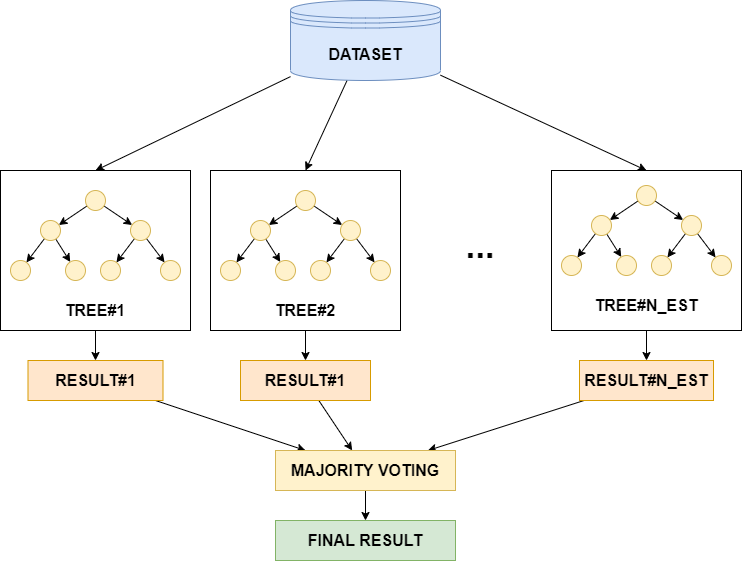

Sumber: Olahan Pribadi

### *Random Forest*

*Random Forest* merupakan salah satu variasi dari konsep *bagging* pada *ensemble learning* yang menggunakan Decision Tree sebagai basis modelnya. Setiap model yang dibangun berupa Decision Tree dan nantinya model tersebut dilatih dan digunakan untuk melakukan prediksi. Output dari Random Forest itu sendiri merupakan hasil prediksi yang paling banyak muncul di antara model-model Decision Tree.

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Melakukan training pada model random forest
rf_md = RandomForestRegressor()
rf_md.fit(X_train, y_train)

# Memprediksi data testing
predicted = rf_md.predict(X_test)

# Menampilkan metrics
metrics(predicted)

MAE: 1390.140425423019
MSE: 5824195.326537604
RMSE: 2413.3369691233765
R_squared: 0.7179994075809082


Terlihat bahwa terdapat perubahan pada metriknya.

Diharapkan untuk mempelajari kelebihan dan kekurangan dari setiap jenis model yang dipelajari agar kita bisa mengetahui pada dataset seperti apa suatu jenis model cocok untuk digunakan. Agar model yang dihasilkan lebih baik, kita juga harus bisa memilih *hyperparameter* yang sesuai dengan permasalahan yang ingin diselesaikan.

Adapun beberapa *hyperparameter* yang dapat kita eksplorasi pada Random Forest:
* `n_estimators`: Berapa banyak decision tree yang akan membentuk random forest
* `max_depth`: Kedalaman maksimal dari masing-masing Decision Tree
* `min_samples_split`: Jumlah sample minimal yang diperlukan untuk memecah suatu internal node pada setiap Decision Tree

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [dokumentasi Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## Hyperparameter Tuning

Hyperparameter tuning dapat digunakan ntuk mendapatkan hasil evaluasi yang terbaik untuk suatu model. Misalkan kita ingin mendapatkan parameter terbaik untuk model Decision Tree, maka kita harus mencoba berbagai kombinasi hyperparameter yang diinginkan. Untuk mempermudah mencari hyperparameter yang tepat, kita dapat menggunakan modul GridSearchCV dari library Scikit-Learn. Informasi lebih lanjut mengenai GridSearchCV dapat diakses [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Beberapa parameter yang sering digunakan, yaitu:
- `estimator`: model yang akan digunakan
- `param_grid`: kombinasi berbagai hyperparameter yang akan digunakan.
- `cv`: jumlah cross-validation yang ingin digunakan

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]}

dt = DecisionTreeRegressor()

clf = GridSearchCV(estimator= dt, 
                   param_grid=param_grid, cv= 5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [18]:
clf.best_params_

{'criterion': 'friedman_mse', 'max_depth': 12, 'min_samples_split': 20}

In [19]:
best_hp = DecisionTreeRegressor(**clf.best_params_)
best_hp.fit(X_train, y_train)
predicted = best_hp.predict(X_test)
metrics(predicted)

MAE: 1428.030002410246
MSE: 5398083.087455952
RMSE: 2323.377517205491
R_squared: 0.7386312540628646


Sekarang kita mendapatkan kombinasi terbaik dari berbagai kombinasi hyperparameter yang telah kita coba.

# Latihan Soal

## SOAL 1

Implementasikan sebuah model Decision Tree untuk melakukan suatu task regresi yang memprediksi `Price` dari suatu penerbangan.

### SOAL 1a
[5] Bangun model decision tree dengan memberikan nilai pada *hyperparameter* 
- `max_depth = 5`
- `random_state = 2023`.

In [20]:
dt_md5 = DecisionTreeRegressor(max_depth=5, random_state=2023)
dt_md5.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=2023)

### SOAL 1b
[5]  Visualisasikan model decision tree yang didapat pada soal 1a!

In [22]:
# Implementasi code di sini

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(dt_md5, feature_names=pd.Series(X.columns).array))

|--- Duration_Hours <= 5.46
|   |--- Airline_Jet Airways Business <= 0.50
|   |   |--- Duration_Hours <= 2.88
|   |   |   |--- Destination_New Delhi <= 0.50
|   |   |   |   |--- Airline_SpiceJet <= 0.50
|   |   |   |   |   |--- value: [4814.44]
|   |   |   |   |--- Airline_SpiceJet >  0.50
|   |   |   |   |   |--- value: [3711.83]
|   |   |   |--- Destination_New Delhi >  0.50
|   |   |   |   |--- Airline_SpiceJet <= 0.50
|   |   |   |   |   |--- value: [7218.93]
|   |   |   |   |--- Airline_SpiceJet >  0.50
|   |   |   |   |   |--- value: [4910.78]
|   |   |--- Duration_Hours >  2.88
|   |   |   |--- Destination_New Delhi <= 0.50
|   |   |   |   |--- Total_Stops <= 1.50
|   |   |   |   |   |--- value: [6095.70]
|   |   |   |   |--- Total_Stops >  1.50
|   |   |   |   |   |--- value: [17432.00]
|   |   |   |--- Destination_New Delhi >  0.50
|   |   |   |   |--- Airline_Jet Airways <= 0.50
|   |   |   |   |   |--- value: [7443.58]
|   |   |   |   |--- Airline_Jet Airways >  0.50
|   |  

### SOAL 1c

[5]  Jika model diberikan data aktual Price 7500, tentukan attribut-attribut yang menghasilkan hasil prediksi terdekat dengan data aktual tersebut. Berikan juga Mean Absolute Error dari hasil prediksi dengan data aktual `Price` dari data X?    

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

Berdasarkan hasil prediksi di atas, atribut yang menghasilkan hasil prediksi terdekat dengan data tersebut adalah:  
Duration_Hours <= 5.46  
Airline_Jet Airways Business <= 0.50  
Duration_Hours >  2.88  
Destination_New Delhi >  0.50  
Airline_Jet Airways <= 0.50  
  
Mean Absolute Errornya adalah: `7500 - 7443.58 = 56.42`

## SOAL 2

Implementasikan sebuah model Decision Tree untuk melakukan suatu task *regresi* yang memprediksi `Price` dari suatu penerbangan. Implementasi pada soal ini akan menggunakan nilai *hyperparameter* 
- `max_depth = 3` 
- `min_samples_split = 50`
- `random_state = 2023`

### SOAL 2a
[5]  Bangun model decision tree sesuai ketentuan.

In [23]:
dt_md3 = DecisionTreeRegressor(max_depth=3, min_samples_split=50, random_state=2023)
dt_md3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=50, random_state=2023)

### SOAL 2b
[5]  Visualisasikan model decision tree yang didapat pada soal 2a!

In [24]:
# Implementasi code di sini

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
print(tree.export_text(dt_md3, feature_names=pd.Series(X.columns).array))

|--- Duration_Hours <= 5.46
|   |--- Airline_Jet Airways Business <= 0.50
|   |   |--- Duration_Hours <= 2.88
|   |   |   |--- value: [4731.90]
|   |   |--- Duration_Hours >  2.88
|   |   |   |--- value: [6434.69]
|   |--- Airline_Jet Airways Business >  0.50
|   |   |--- value: [52229.00]
|--- Duration_Hours >  5.46
|   |--- Airline_Jet Airways Business <= 0.50
|   |   |--- Airline_Jet Airways <= 0.50
|   |   |   |--- value: [10082.98]
|   |   |--- Airline_Jet Airways >  0.50
|   |   |   |--- value: [12677.78]
|   |--- Airline_Jet Airways Business >  0.50
|   |   |--- value: [60178.50]



### SOAL 2c

[5]  Jika model diberikan data aktual Price 7500, tentukan attribut-attribut yang menghasilkan hasil prediksi terdekat dengan data aktual tersebut. Berikan juga Mean Absolute Error dari hasil prediksi dengan data aktual `Price` dari data X?    

**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

Berdasarkan hasil prediksi di atas, atribut yang menghasilkan hasil prediksi terdekat dengan data tersebut adalah:   
Duration_Hours <= 5.46  
Airline_Jet Airways Business <= 0.50  
Duration_Hours >  2.88  
    
Mean Absolute Errornya adalah: `7500 - 6434.69 = 1.065,31`

## SOAL 3
[5]

Implementasikan sebuah model Random Forest untuk melakukan suatu task *regresi* yang memprediksi `Price` dari suatu penerbangan. Implementasi pada soal ini akan menggunakan nilai *hyperparameter* 
- `max_depth = 5`
- `random_state = 2023`

In [50]:
# Implementasi code di sini

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan training pada model random forest
rf_md5 = RandomForestClassifier(max_depth=5, n_estimators=2023)
rf_md5.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=2023)

## SOAL 4

[15]
* Lakukan prediksi terhadap data *testing* (`X_test`) menggunakan model yang sudah dibangun pada soal 1, 2, dan 3.
* Lakukan evaluasi pada hasil prediksi yang didapat terhadap label aktual (`y_test`). Metrik evaluasi yang ditampilkan adalah nilai MAE, MSE, RMSE, dan $R^{2}$ dari hasil prediksi yang didapat.  
* Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (minimal 4 poin).

In [30]:
# Memprediksi data testing
predicted_dt_md5 = dt_md5.predict(X_test)

# Menampilkan metrics evaluasi 
metrics(predicted_dt_md5)

MAE: 1732.8164641031087
MSE: 6533478.306130572
RMSE: 2556.0669604160553
R_squared: 0.6836567715215329


In [29]:
# Memprediksi data testing
predicted_dt_md3 = dt_md3.predict(X_test)

# Menampilkan metrics evaluasi 
metrics(predicted_dt_md3)

MAE: 2183.972453051509
MSE: 9673264.00278132
RMSE: 3110.1871330807926
R_squared: 0.5316320922512257


In [51]:
# Memprediksi data testing
predicted_rf_md5 = rf_md5.predict(X_test)

# Menampilkan metrics evaluasi 
metrics(predicted_rf_md5)

MAE: 1963.1201797079746
MSE: 11090141.547734931
RMSE: 3330.1864133611098
R_squared: 0.4630285711361879


Berdasarkan hasil evaluasi yang telah ditampilkan di atas:
- Hasil prediksi yang memiliki MAE terbesar adalah hasil prediksi data testing 2, MAE sendiri mengukur besarnya rata-rata kesalahan dalam serangkaian forecasting yang mengukur akurasi untuk variabel kontinu. Semakin besar nilai MAEnya, maka semakin tidak akurat. 
- Hasil prediksi yang memiliki MSE terbesar adalah hasil prediksi data testing 3, MSE sendiri adalah rata-rata kuadrat kesalahan. Semakin besar angkanya, semakin besar kesalahannya.
- Hasil prediksi yang memiliki RMSE terbesar adalah hasil prediksi data testing 3. RMSE diartikan sebagai kesalahan rata-rata yang dimiliki prediksi model dibandingkan dengan yang sebenarnya. Semakin besar hasil RMSE, makin besar kesalahannya.
- Dari hasil evaluasi, R squared yang paling besar adalah hasil prediksi data testing 1, artinya data testing tersebut merupakan data dengan hasil testing terbaik.

## SOAL 5

Gunakan GridSearchCV untuk mencari hyperparameter yang baik untuk model Random Forest. 

### Soal 5a
[9]
Proses Grid search diwajibkan melakukan tuning pada hyperparameter berikut: **criterion, max_depth, min_samples_split**.
*Namun, kalian masih boleh mengambil hyperparameter lain.*

In [37]:
param_grid = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
               'min_samples_split': [10, 20],
               'max_depth' : [5, 10]}

clf = GridSearchCV(estimator = RandomForestRegressor(), 
                   param_grid=param_grid, cv= 5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 10], 'min_samples_split': [10, 20]})

### Soal 5b
[1]

Tampilkan hyperparameter terbaik yang kalian dapatkan dari proses Grid Search

In [39]:
clf.best_params_

{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_split': 20}

### Soal 5c
[5]

Buatlah model Random Forest berdasarkan hyperparameter yang kalian dapatkan dari **soal 5a**

In [46]:
# Melakukan training pada model random forest
rf = RandomForestRegressor(criterion= 'friedman_mse', min_samples_split=20, max_depth=10)
rf.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=20)

### Soal 5d
[5]

Lakukan prediksi dengan X_test dan **munculkan** hasil evaluasi terhadap label y_test


In [48]:
prediction5d = rf.predict(X_test)
metrics(prediction5d)

MAE: 1448.9812455731094
MSE: 5624530.867490874
RMSE: 2371.6093412471782
R_squared: 0.7276669225901771


## SOAL 6
[15]
1. Jelaskan apa fungsi _hyperparameter_ min_samples_split dan apa yang terjadi apabila kita memasang angka yang terlalu besar (misal 10000)?
2. Apa bedanya min_samples_split dengan min_samples_leaf?
3. Sebutkan kelebihan dan kekurangan menggunakan GridSearch!

1. Hyperparameter ini digunakan untuk memastikan bahwa beberapa sampel menginformasikan setiap decision pada tree, dengan mengontrol split mana yang akan dipertimbangkan.
2. min_sample_split merupakan jumlah minimum yang dibutuhkan untuk split. Sedangkan, min_samples_leaf merupakan jumlah minimum yang dibutuhkan untuk menjadi leaf node.
3. Kelebihan metode ini adalah menemukan hyperparameter yang terbaik, sedangkang kelebihannya adalah operasi yang membutuhkan banyak waktu.

## SOAL 7
[15]

1. Pada dataset yang seperti apa kita menggunakan Decision Tree sebagai model kita?
2. Apa yang terjadi apabila kita menggunakan DecisionTreeClasifier sebagai model untuk masalah regresi? Bagaimana juga jika DecisionTreeRegressor digunakan untuk masalah klasifikasi? Jelaskan apa saja masalahnya!

1. Data set yang digunakan adalah non-linear.
2. Model tersebut bisa saja digunakan untuk masalah regresi dan klasifikasi. Namun hasilnya tidak akan selalu baik karena model yang digunakan seharusnya digunakan pada masalah yang terkait. Pada saat menggunakan regression untuk masalah klasifikasi, ini disebut sebagai diskritisasi, variabel output yang dihasilkan adalah klasifikasi yang labelnya memiliki hubungan yang teratur/ordinal. Sebaliknya, jika clasifier digunakan untuk masalah regresi, maka hasilnya tidak berurut/ordinal secara alami, selain itu, dapat menghasilkan kinerja yang buruk karena model dapat mempelajari pemetaan yang salah.